In [35]:
!pip3 install essentia

In [36]:
!pip3 install madmom

In [37]:
!pip3 install mir_eval

The section below is all path dependent

In [38]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root = 'drive/MyDrive/Bass/'

import pandas as pd
import sys
sys.path.append(root)

Mounted at /content/drive


In [39]:
import madmom

In [41]:
from essentia.standard import *
from essentia import Pool, array
import essentia.standard as es
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import pandas as pd
import os

import IPython
import pickle
from pickle import load
from scipy.signal import find_peaks
import ipywidgets as widgets
from scipy import signal
from lxml import etree

import plotly.express as px
import scipy
from statistics import *

In [42]:
import mir_eval
from mir_eval import *

In [43]:
statsPath = 'drive/MyDrive/Bass/data/brown/StudentStatistics_brown.csv'
statsCols = ["Student", "precision", "recall", "f_measure_value", "Onset ABS Mean", "Onset Mean", "Onset Std",
             "Duration ABS Mean", "Duration Mean", "Duration Std", "onsetMark", " DurationMark", " TF 1 Mark ",
             "Sound Quality Mark",  " finalMark"]
df_all = pd.read_csv(statsPath, usecols=statsCols)
   

In [44]:
col_list = ["onset dev", "offset dev"]
sonset_deviations = []
soffset_deviations = []
# sonset_deviations,soffset_deviations
k=0
while k<9:
   sdeviatePath = 'drive/MyDrive/Bass/data/brown/brown_devs_student' + str(k)+ '.csv'
   sdf = pd.read_csv(sdeviatePath, usecols=col_list)
   sonset_dev_list = sdf["onset dev"]
   sonset_deviations.append(sonset_dev_list)
   soffset_dev_list = sdf["offset dev"] 
   soffset_deviations.append(soffset_dev_list)
   k+=1

In [45]:
df_all

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,Sound Quality Mark,finalMark
0,0,0.893,0.905,0.899,0.005,-0.003,0.006,0.005,-0.003,0.006,100.0,100.0,100.0,100.0,5.0
1,1,0.376,0.381,0.378,0.010,-0.002,0.011,0.022,0.021,0.024,72.0,90.0,72.0,79.2,2.7
2,2,0.571,0.571,0.571,0.010,-0.001,0.011,0.023,0.020,0.026,79.2,90.0,79.2,79.2,3.6
3,3,0.235,0.238,0.236,0.011,0.008,0.013,0.025,0.017,0.028,79.2,79.2,79.2,90.0,3.6
4,4,0.091,0.088,0.090,0.007,0.007,0.010,0.000,0.000,0.000,90.0,90.0,90.0,79.2,4.5
5,5,0.276,0.272,0.274,0.010,-0.000,0.012,0.017,0.016,0.021,72.0,79.2,79.2,79.2,3.6
6,6,0.464,0.435,0.449,0.010,0.000,0.011,0.025,0.017,0.026,72.0,79.2,79.2,90.0,3.6
7,7,0.376,0.381,0.378,0.010,-0.002,0.011,0.022,0.021,0.024,79.2,72.0,79.2,72.0,2.7
8,8,0.571,0.571,0.571,0.010,-0.001,0.011,0.023,0.020,0.026,56.7,72.0,33.3,33.3,0.9


In [46]:

number_of_rows = len(df_all.index)


In [47]:
import csv  
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std= 
# statisticsGenerator(sonset_deviationsArray,sduration_deviationsArray," onsets", " durations",the_student_grades,sp,sr,sf)

def statisticsGenerator(deviationsArray1,deviationsArray2,title_text1,title_text2,df):
   header = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std",
             "Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," TF 1 Mark ","soundQualityMark"," finalMark"]

   studentStatisticsArray= []
   with open('drive/MyDrive/Bass/data/StudentStatistics_blend_brown.csv', 'w', encoding='UTF8') as f:
      idx = df.index

      number_of_rows = len(idx)
      print(number_of_rows)
      k=0

      writer = csv.writer(f)
      # write the header
      writer.writerow(header)

      studentStatistics = []
      onset_X = []  # Martis mark
      onset_amean = []
      onset_mean = []
      onset_std= []

      duration_X = [] # Martis mark
      duration_amean = []
      duration_mean = []
      duration_std= []
      list0 = df["onsetMark"].tolist()  
      list1 = df[" DurationMark"].tolist()  
      list2 = df[" TF 1 Mark "].tolist()  
      list3 = df["Sound Quality Mark"].tolist()  
      list4 = df[" finalMark"].tolist()  

      listp = df["precision"].tolist()  
      listr = df["recall"].tolist()  
      listf = df["f_measure_value"].tolist()  
      print("###################### number_of_rows",number_of_rows)
      while k < number_of_rows-1:
          studentStatistics.append(str(k+1))
          student_stats1 = [] # onsets
          student_stats2 = [] # durations

          plt.subplot(2,2,1)
          a = np.array(deviationsArray1[k])
          onset_m, onset_s = mean(a), sqrt(mean(a*a))
          onset_am= mean(abs(a))
          onset_summary= "Onset ABS  Mean: %f,Onset Mean: %f, Dev. from 0: %f" %(onset_am,onset_m, onset_s)
          title =   "Student " + str(k)+ title_text1

          onset_X.append( list0[k])  # Martis mark
          onset_mean.append(onset_m)
          onset_amean.append(onset_am)
          onset_std.append(onset_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.subplot(2,2,2)
          a = np.array(deviationsArray2[k])
          duration_m, duration_s = mean(a), sqrt(mean(a*a))
          duration_am= mean(abs(a))
          duration_summary= "Offset Mean: %f, Dev. from 0: %f" %(duration_m, duration_s)
          title =   "Student " + str(k)+ title_text2
          print(title)
          duration_X.append( list1[k])  # Martis mark
          duration_mean.append(duration_m)
          duration_amean.append(duration_am)
          duration_std.append(duration_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.show()
          print("Onset Grade = ", list0[k],"\t" ,"Duration Grade = ", list1[k])
          print(onset_summary)
          print(duration_summary)
          print("TF 1 Mark = ", list2[k],"Sound Control Grade = ", list3[k])
          print("Final Mark = ", list4[k])
          studentStatistics = []
          studentStatistics.append(str(k))
          studentStatistics.append(round(listp[k],3))
          studentStatistics.append(round(listr[k],3))
          studentStatistics.append(round(listf[k],3))
          print("F-measure = ", round(listf[k],3))
          studentStatistics.append(round(onset_am,3))
          studentStatistics.append(round(onset_m,3))
          studentStatistics.append(round(onset_s,3))   
          studentStatistics.append(round(duration_am,3))                   
          studentStatistics.append(round(duration_m,3)) 
          studentStatistics.append(round(duration_s,3))   
          studentStatistics.append(list0[k])
          studentStatistics.append(list1[k])
          studentStatistics.append(list2[k])
          studentStatistics.append(list3[k])
          studentStatistics.append(list4[k])
          # write the data
          writer.writerow(studentStatistics)
          studentStatisticsArray.append(studentStatistics)
          k+=1
          print("////////////////////////////")
   return(onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,studentStatisticsArray,onset_amean, duration_amean)
# Capture a table of onset and grade


9
###################### number_of_rows 9
Student 0 offset


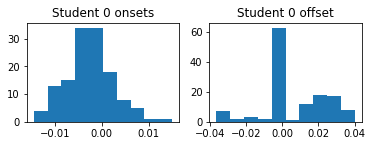

Onset Grade =  100.0 	 Duration Grade =  100.0
Onset ABS  Mean: 0.004587,Onset Mean: -0.002528, Dev. from 0: 0.005722
Offset Mean: 0.007186, Dev. from 0: 0.018169
TF 1 Mark =  100.0 Sound Control Grade =  100.0
Final Mark =  5.0
F-measure =  0.899
////////////////////////////
Student 1 offset


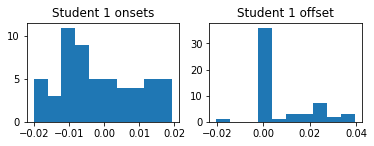

Onset Grade =  72.0 	 Duration Grade =  90.0
Onset ABS  Mean: 0.009553,Onset Mean: -0.001573, Dev. from 0: 0.011034
Offset Mean: 0.007699, Dev. from 0: 0.014919
TF 1 Mark =  72.0 Sound Control Grade =  79.2
Final Mark =  2.7
F-measure =  0.378
////////////////////////////
Student 2 offset


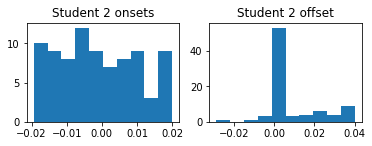

Onset Grade =  79.2 	 Duration Grade =  90.0
Onset ABS  Mean: 0.009737,Onset Mean: -0.001036, Dev. from 0: 0.011366
Offset Mean: 0.007442, Dev. from 0: 0.016045
TF 1 Mark =  79.2 Sound Control Grade =  79.2
Final Mark =  3.6
F-measure =  0.571
////////////////////////////
Student 3 offset


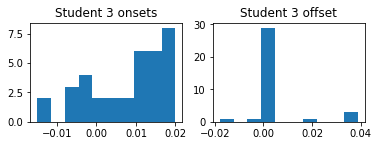

Onset Grade =  79.2 	 Duration Grade =  79.2
Onset ABS  Mean: 0.011267,Onset Mean: 0.007745, Dev. from 0: 0.012775
Offset Mean: 0.002986, Dev. from 0: 0.011572
TF 1 Mark =  79.2 Sound Control Grade =  90.0
Final Mark =  3.6
F-measure =  0.236
////////////////////////////
Student 4 offset


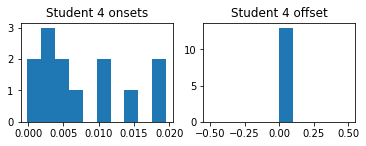

Onset Grade =  90.0 	 Duration Grade =  90.0
Onset ABS  Mean: 0.007332,Onset Mean: 0.007316, Dev. from 0: 0.009575
Offset Mean: 0.000000, Dev. from 0: 0.000000
TF 1 Mark =  90.0 Sound Control Grade =  79.2
Final Mark =  4.5
F-measure =  0.09
////////////////////////////
Student 5 offset


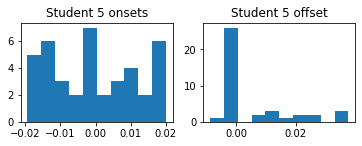

Onset Grade =  72.0 	 Duration Grade =  79.2
Onset ABS  Mean: 0.010424,Onset Mean: -0.000368, Dev. from 0: 0.012169
Offset Mean: 0.006308, Dev. from 0: 0.013004
TF 1 Mark =  79.2 Sound Control Grade =  79.2
Final Mark =  3.6
F-measure =  0.274
////////////////////////////
Student 6 offset


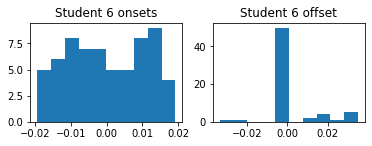

Onset Grade =  72.0 	 Duration Grade =  79.2
Onset ABS  Mean: 0.009614,Onset Mean: 0.000087, Dev. from 0: 0.010985
Offset Mean: 0.003614, Dev. from 0: 0.012163
TF 1 Mark =  79.2 Sound Control Grade =  90.0
Final Mark =  3.6
F-measure =  0.449
////////////////////////////
Student 7 offset


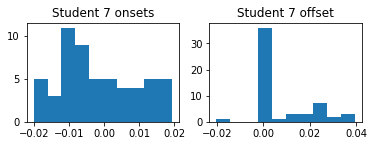

Onset Grade =  79.2 	 Duration Grade =  72.0
Onset ABS  Mean: 0.009553,Onset Mean: -0.001573, Dev. from 0: 0.011034
Offset Mean: 0.007699, Dev. from 0: 0.014919
TF 1 Mark =  79.2 Sound Control Grade =  72.0
Final Mark =  2.7
F-measure =  0.378
////////////////////////////


In [48]:
onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

In [51]:
import pandas as pd
#sonset_deviations,soffset_deviations

In [52]:
data_timing_onset0= { 'onsets0' :sonset_deviations[0]}
df = pd.DataFrame(data_timing_onset0,columns=['onsets0'])
fig = px.histogram(df, x="onsets0")
fig.show()

In [53]:

data_timing_duration0= { 'durations0' :soffset_deviations[0]}
df = pd.DataFrame(data_timing_duration0,columns=['durations0'])
fig = px.histogram(df, x="durations0")
fig.show()

In [56]:
dataset = pd.read_csv('drive/MyDrive/Bass/data/brown//StudentStatistics_brown.csv') 
#dataset = pd.read_csv('drive/MyDrive/Bass/data/StudentStatisticsBillie.csv')
header = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std",
             "Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," TF 1 Mark ","soundQualityMark"," finalMark"]

In [57]:
dataset

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,Sound Quality Mark,finalMark
0,0,0.893,0.905,0.899,0.005,-0.003,0.006,0.005,-0.003,0.006,100.0,100.0,100.0,100.0,5.0
1,1,0.376,0.381,0.378,0.010,-0.002,0.011,0.022,0.021,0.024,72.0,90.0,72.0,79.2,2.7
2,2,0.571,0.571,0.571,0.010,-0.001,0.011,0.023,0.020,0.026,79.2,90.0,79.2,79.2,3.6
3,3,0.235,0.238,0.236,0.011,0.008,0.013,0.025,0.017,0.028,79.2,79.2,79.2,90.0,3.6
4,4,0.091,0.088,0.090,0.007,0.007,0.010,0.000,0.000,0.000,90.0,90.0,90.0,79.2,4.5
5,5,0.276,0.272,0.274,0.010,-0.000,0.012,0.017,0.016,0.021,72.0,79.2,79.2,79.2,3.6
6,6,0.464,0.435,0.449,0.010,0.000,0.011,0.025,0.017,0.026,72.0,79.2,79.2,90.0,3.6
7,7,0.376,0.381,0.378,0.010,-0.002,0.011,0.022,0.021,0.024,79.2,72.0,79.2,72.0,2.7
8,8,0.571,0.571,0.571,0.010,-0.001,0.011,0.023,0.020,0.026,56.7,72.0,33.3,33.3,0.9


In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#X = dataset[['P', 'R', 'F',  ' ABS Mean Onset','Mean  Onset','Std Onset',' ABS Mean Duration','Mean Duration','Std Duration']]
#X = dataset[['precision', 'recall', 'f_measure_value',  'Onset ABS Mean','Onset Mean','Onset Std']]
#X = dataset[['precision','recall','f_measure_value']]#,'Onset Mean','Onset Std']]
X = dataset[['f_measure_value']]#,]]
y=array(dataset['onsetMark'])

#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(round(df,3))
print("Onset Grades")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))






      Actual  Predicted
0  79.199997     77.931
1  79.199997     79.709
2  72.000000     77.931
Onset Grades
Mean Absolute Error: 2.57
Root Mean Squared Error: 3.514


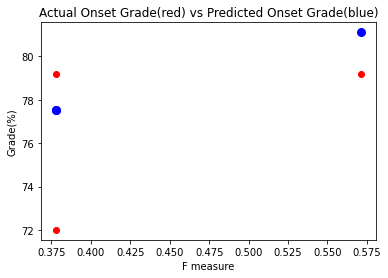

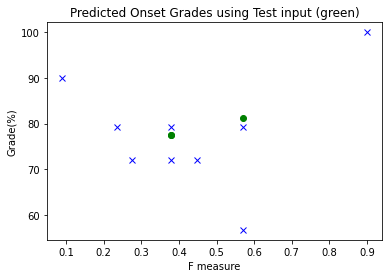

In [69]:
onset_grade_list = df_all["onsetMark"].tolist()   
onset_f_measure_value_list = df_all["f_measure_value"].tolist()   
plt.title('Actual Onset Grade(red) vs Predicted Onset Grade(blue)')
plt.xlabel('F measure')
plt.ylabel('Grade(%)')
plt.scatter(X_test["f_measure_value"].tolist(), y_test,  color='red')
plt.scatter(X_test["f_measure_value"].tolist(), y_pred, color='blue', linewidth=3)
plt.show()

plt.title('Predicted Onset Grades using Test input (green)')
plt.xlabel('F measure')
plt.ylabel('Grade(%)')
plt.plot(onset_f_measure_value_list,onset_grade_list, 'x',color='blue')
plt.plot(X_test["f_measure_value"].tolist(),y_pred, 'o', color='green')
plt.show()

In [ ]:
dataset

In [94]:
X = dataset[['f_measure_value','Duration ABS Mean','Duration Std']]
#X = dataset[['precision','recall','f_measure_value','Duration ABS Mean']]
y=array(dataset[' DurationMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# of you ommit it will be random
# related to the seed in random function
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(round(df,3))
print("Duration Grades")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))




   Actual  Predicted
0    72.0     78.778
1    90.0     79.201
2    90.0     78.778
Duration Grades
Mean Absolute Error: 9.6
Root Mean Squared Error: 9.806


[72. 90. 90.]
[78.77751059 79.20136864 78.77751059]


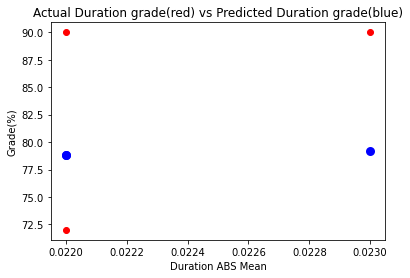

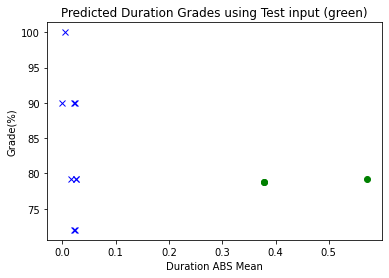

In [92]:
duration_amean_list = df_all["Duration ABS Mean"].tolist()   
duration_grade_list = df_all[" DurationMark"].tolist()   
   
plt.title('Actual Duration grade(red) vs Predicted Duration grade(blue)')
plt.xlabel('Duration ABS Mean')
plt.ylabel('Grade(%)')
plt.scatter(X_test["Duration ABS Mean"].tolist(), y_test,  color='red')
plt.scatter(X_test["Duration ABS Mean"].tolist(), y_pred, color='blue', linewidth=3)
print(y_test)
print(y_pred)
plt.show()

plt.title('Predicted Duration Grades using Test input (green)')
plt.xlabel('Duration ABS Mean')
plt.ylabel('Grade(%)')
plt.plot(duration_amean_list,duration_grade_list, 'x',color='blue')
plt.plot(X_test["f_measure_value"].tolist(),y_pred, 'o', color='green')
plt.show()

In [ ]:
dataset

In [ ]:
X = dataset[['precision','recall','f_measure_value','Onset ABS Mean','Duration ABS Mean']]
y=array(dataset[' finalMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:


X = dataset[['precision','recall','f_measure_value']]
y=array(dataset[' TF 1 Mark '])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))